In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
file = 'VarAstro_Star_61740_Obs_110560_2025-10-20.txt'
transit_data = np.loadtxt(file, skiprows=14)
#print(transit_data)
#print(np.shape(transit_data))

Link stella: https://simbad.cds.unistra.fr/simbad/sim-basic?Ident=HD189733&submit=SIMBAD+search

Link pianeta: https://exoplanet.eu/catalog/hd_189733_ab--307/, https://exoplanetarchive.ipac.caltech.edu/overview/HD%20189733

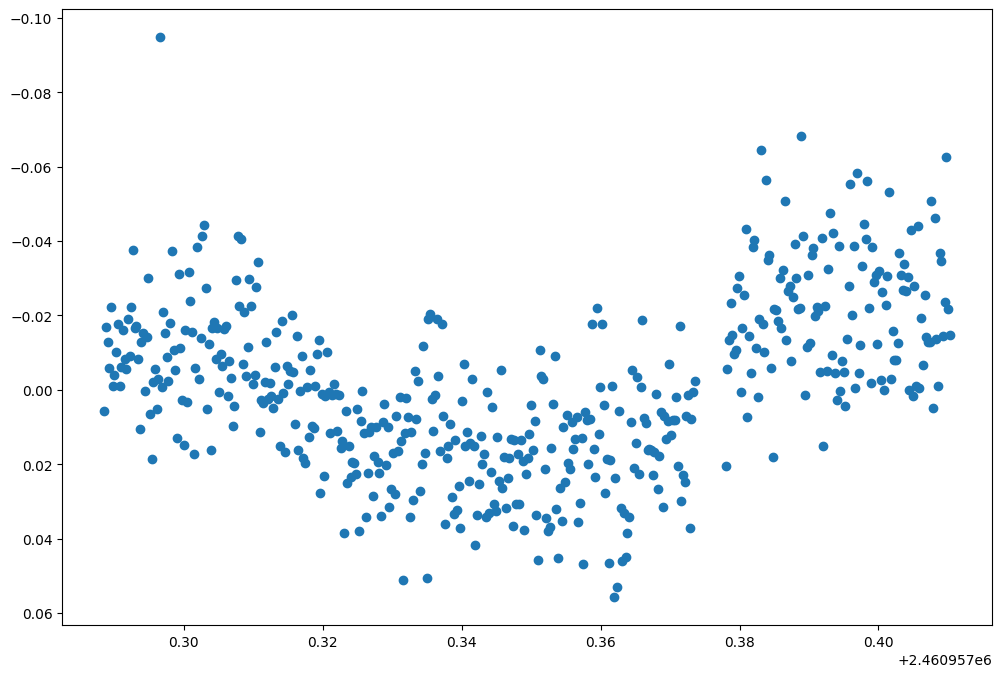

In [3]:
time = transit_data[:, 0]
mag = transit_data[:, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(time, mag)
ax.invert_yaxis()

plt.show()

In [4]:
df = pd.DataFrame(transit_data)
df.columns=('t', 'm')
df

,t,m
0,2.460957e+06,0.005622
1,2.460957e+06,-0.016824
2,2.460957e+06,-0.012724
3,2.460957e+06,-0.005839
4,2.460957e+06,-0.022262
...,...,...
480,2.460957e+06,-0.014337
481,2.460957e+06,-0.023640
482,2.460957e+06,-0.062526
483,2.460957e+06,-0.021592


Plot con andamento teorico, evidenziare che pt non si dispongono, plot con limb darkening (atmosfere stelle hanno lunghezza ottica diversa)

$\displaystyle T_\text{dur} = \frac{P}{\pi} \arcsin{\left(\frac{\sqrt{(R_* + R_P)^2 - a^2 \cos{i}^2}}{a}\right)}$

$P$ è il periodo, $i$ angolo di inclinazione, $a$ è il semiasse maggiore

Per $a \gg R_* \gg R_P$, $\displaystyle T_\text{dur} \simeq \frac{P}{\pi} \sqrt{\left(\frac{R_*}{a}\right)^2 -\cos{i}^2}$

Sapendo il tipo di stella, $M_*, R_*$ sono ricavabili dal diagramma HR

$T_\text{dur}, P$ sufficienti a dedurre l'angolo

La transit depth da rapporto tra i raggi: $\frac{\Delta F}{F} = \frac{R_P^2}{R_*^2}$

PER RADDIRZZARE:
* media 1° dieci pt
* media ultimi dieci pt
* retta che li congiunge
* angolo con gli assi
* matrice di rotazione ai pt

In [46]:
df['delta'] = df.loc[:, 't'] - df.at[0, 't']
df

,t,m,delta
0,2.460957e+06,0.005622,0.000000
1,2.460957e+06,-0.016824,0.000242
2,2.460957e+06,-0.012724,0.000485
3,2.460957e+06,-0.005839,0.000728
4,2.460957e+06,-0.022262,0.000971
...,...,...,...
480,2.460957e+06,-0.014337,0.120732
481,2.460957e+06,-0.023640,0.120975
482,2.460957e+06,-0.062526,0.121218
483,2.460957e+06,-0.021592,0.121460


In [50]:
delta = df['delta']

m_media_p = df.loc[0:10, 'm'].mean()
m_media_u = df.loc[474:484, 'm'].mean()
m_delta_media = m_media_u - m_media_p

d_media_p = df.loc[0:10, 'delta'].mean()
d_media_u = df.loc[474:484, 'delta'].mean()
d_delta_media = t_media_u - t_media_p

m = (m_media_p-m_media_u)/(d_media_p-d_media_u)
b =(d_media_p*m_media_u - d_media_u*m_media_p)/(d_media_p-d_media_u)
y = m*delta + b

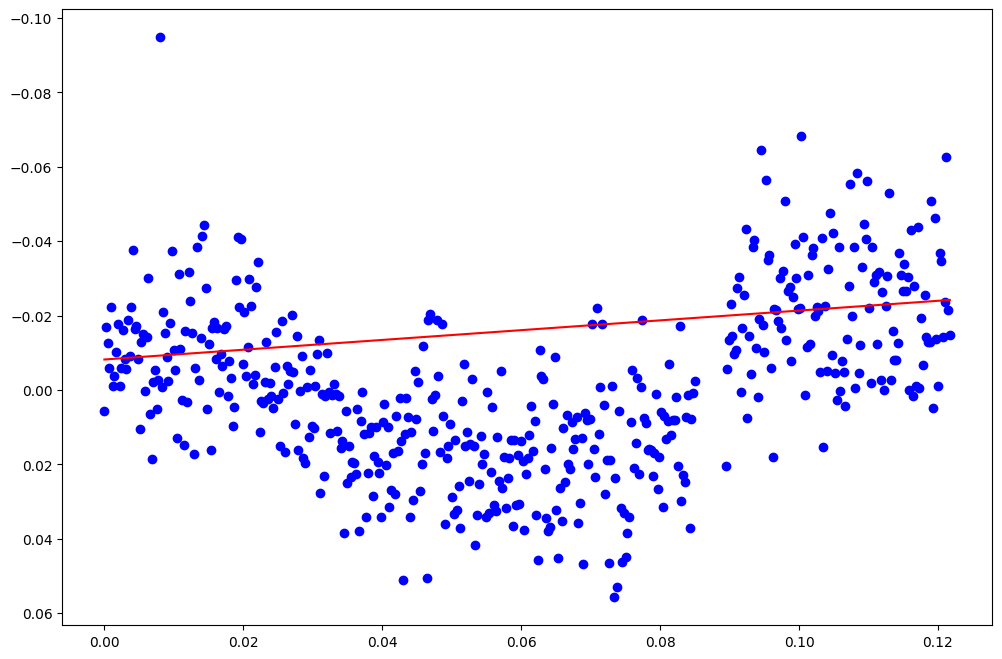

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(delta, mag, c='b')
ax.plot(delta, y, c='r')
ax.invert_yaxis()

plt.show()

In [70]:
theta = -math.atan(m) #se l'angolo è theta, devo ruotare di -theta
rotmtrx = np.array([[np.cos(theta), -np.sin(theta)], 
                    [np.sin(theta),  np.cos(theta)]])

mtrx = df[['delta', 'm']].to_numpy()
rotated = np.dot(mtrx, rotmtrx)
rotated #non va bene

array([[ 7.33407467e-04,  5.57395708e-03],
       [-1.95481141e-03, -1.67117998e-02],
       [-1.17902994e-03, -1.26785366e-02],
       [-3.99369790e-05, -5.88407257e-03],
       [-1.94144499e-03, -2.21984296e-02],
       [ 1.07408572e-03, -1.14288438e-03],
       [ 9.41835376e-04, -4.00307372e-03],
       [ 3.68809594e-04, -1.02285204e-02],
       [-3.82754583e-04, -1.78032062e-02],
       [ 2.02348197e-03, -1.37068274e-03],
       [ 1.62565473e-03, -6.26460607e-03],
       [ 5.54219956e-04, -1.62703383e-02],
       [ 1.81854791e-03, -8.52407795e-03],
       [ 2.39035263e-03, -6.03338741e-03],
       [ 9.03294195e-04, -1.91978936e-02],
       [ 2.42774568e-03, -9.47467304e-03],
       [ 9.39513173e-04, -2.26481023e-02],
       [-8.04147017e-04, -3.77627993e-02],
       [ 2.18404092e-03, -1.69073975e-02],
       [ 2.33716963e-03, -1.76063465e-02],
       [ 3.72287139e-03, -8.92997147e-03],
       [ 6.42865444e-03,  9.76379870e-03],
       [ 3.61389604e-03, -1.34836690e-02],
       [ 3.